# EDA Churn

A ideia da análise é entender melhor os dados para que seja possível definir os passos da construção do modelo de Machine Learning.

In [4]:
# O primeiro passo é instalar as bibliotecas necessárias para a análise, dessa forma poderemos nos concentrar somente nos dados.

#!pip install matplotlib    # Utilizado para gráficos.
#!pip install numpy         # Utilizado para funções matemáticas.
#!pip install seaborn       # Utilizado para plotar gráficos.
#!pip install pandas        # Utilizado para a manipulação e análise de dados.

In [15]:
# Agora podemos importá-las para  uso. Para facilitar ainda mais o trabalho, vamos utilizar os acrónimos como: pd, np, px...

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Importar a base de dados para um Dataframe do Pandas.

df = pd.read_csv("churn-20.csv")
display(df)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [17]:
# Checar o tadatype de cada coluna.

df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [68]:
# Aqui iremos contar quandos clientes realmente deixaram os serviços da empresa e calcular a porcentagem.

df["Churn"].value_counts()
print((95/572)* 100)

16.60839160839161


## Vamos plotar alguns gráficos para visualizar melhor os dados.

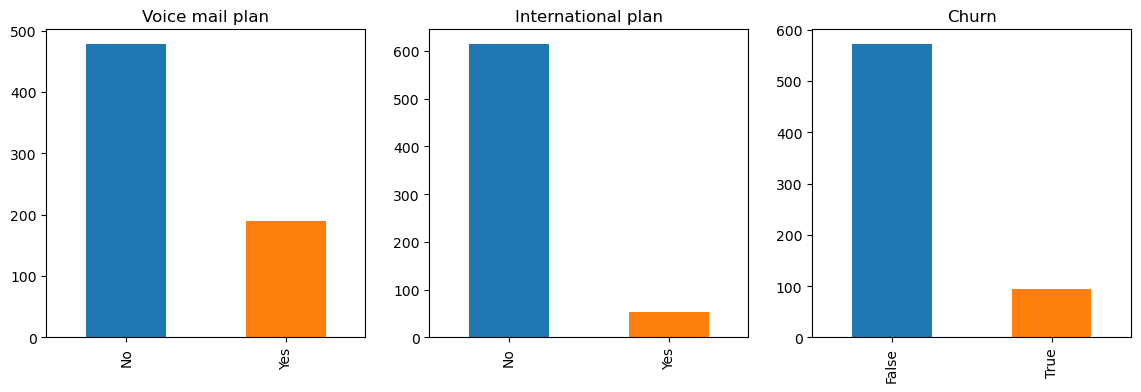

In [19]:
# Aqui usamos um for loop para visualizar melhor as diferenças básicas entre os clientes mantidos e os perdidos.

cols = ["Voice mail plan", "International plan", "Churn"]
numerical = cols

plt.figure(figsize=(14,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1,len(numerical), i+1)
    df[str(col)].value_counts().plot(kind="bar", color=["C0", "C1"])
    ax.set_title(f"{col}")

In [20]:
# Muitas vezes a geografia pode ser relevante, por isso vamos separar os clientes perdidos por estado

dfx = df[["State", "Churn"]]
churn = dfx.groupby(["State"]).count().sort_values(["Churn"], ascending=False).rename(columns={"Churn" : "Sum of Churn"}).reset_index()
churn.head(10)

fig1 = px.bar(churn, x = "State", y = "Sum of Churn", color_discrete_sequence =['dodgerblue']*len(churn))
fig1.show()

In [21]:
# Para ter uma visão ainda mais ampla, vamos importar uma nova base de dados com os nomes e regiões de cada estado.

state = pd.read_excel("states.xlsx")
state.rename(columns={'State': 'Name', 'Abbr': 'State'}, inplace=True)
state.head()

,Name,State,State Capital,Region
0,Alabama,AL,Montgomery,South
1,Alaska,AK,Juneau,West
2,Arizona,AZ,Phoenix,West
3,Arkansas,AR,Little Rock,South
4,California,CA,Sacramento,West


In [22]:
# Utilizaremos a função merge para juntar as duas bases e iniciar a plotagem dos dados por região.

region = pd.merge(churn, state, how='inner', on = 'State')
region.head()

,State,Sum of Churn,Name,State Capital,Region
0,AZ,19,Arizona,Phoenix,West
1,KS,18,Kansas,Topeka,Midwest
2,WV,18,West Virginia,Charleston,South
3,WA,18,Washington,Olympia,West
4,NM,18,New Mexico,Santa Fe,West


In [23]:
# Vamos agrupar o número de clientes perdidos em regiões geográficas e tentar entender se há algum insight.

region_group = region.groupby('Region', as_index=False)['Sum of Churn'].count()
display(region_group)


fig = px.pie(region_group, values='Sum of Churn', names='Region', title='Churm by US Region')
fig.show()

,Region,Sum of Churn
0,Midwest,12
1,Northeast,11
2,South,14
3,West,13


In [28]:
# Vamos checar a média e o Desvio Padrão das colunas relacionadas ao comportamento dos clientes e agrupar por Churn.
cal = df[["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls", "Churn"]]

display(cal.groupby(["Churn"]).mean())

display(cal.groupby(["Churn"]).std())

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,
False,102.636364,8.991259,175.460140,100.776224,29.828829,199.799650,100.047203,16.983024,198.815385,100.258741,8.946731,10.242657,4.512238,2.766084,1.437063
True,104.073684,4.894737,213.991579,101.905263,36.379053,224.764211,103.063158,19.105053,204.923158,99.242105,9.221789,10.212632,4.621053,2.758105,2.326316


,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,
False,41.510203,14.244485,50.527512,20.279110,8.589717,48.172766,18.731288,4.094821,50.406808,20.295441,2.268607,2.804668,2.421776,0.757344,1.210530
True,36.561299,11.853246,70.962188,21.176097,12.063437,53.644848,20.115523,4.559200,45.568206,19.497253,2.050324,2.841757,2.832858,0.767107,1.734764


C:\Users\FT05\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



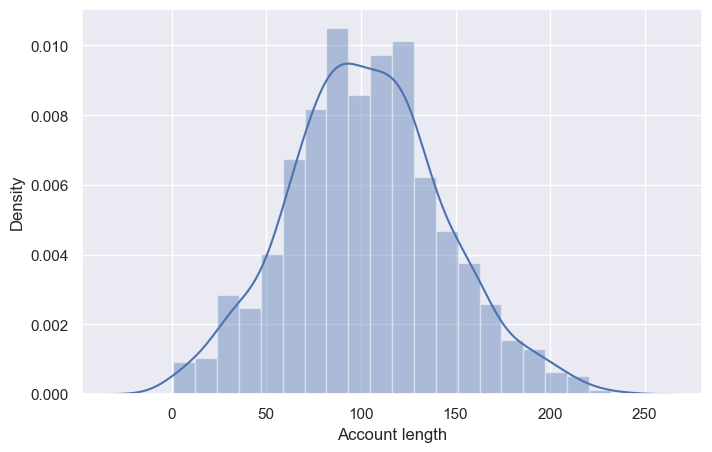

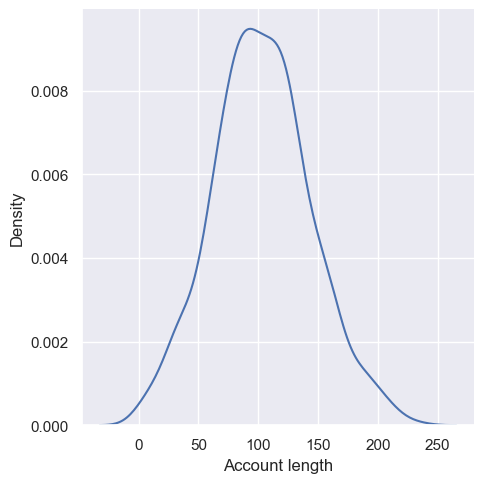

In [69]:
# Visualizar a Distribuição do Account length

sns.distplot(df["Account length"])
sns.displot(df["Account length"], kind="kde")

# Differences in account length
# To remove outliyers you can use the sym = ""
#sns.boxplot(x = "Churn", y = "Account length", data = df, sym = "")
#plt.show()

#Customer Service Calls
#sns.boxplot(x = "Churn", y = "Customer service calls", data = df, sym = "")

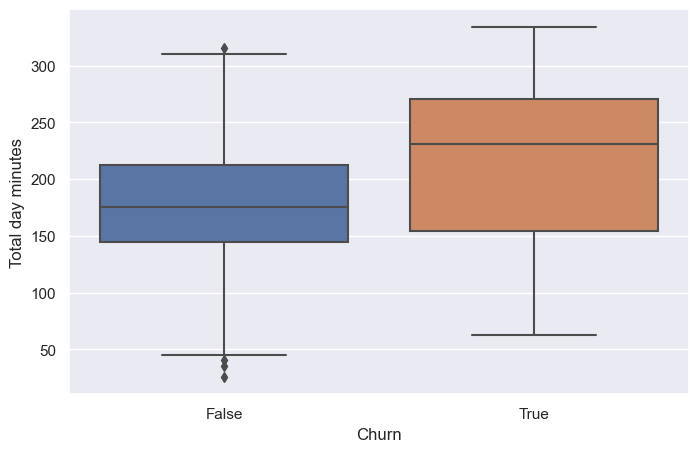

In [66]:
# Aqui comparamos 

sns.boxplot(x = "Churn", y = "Total day minutes", data = df)
plt.show()

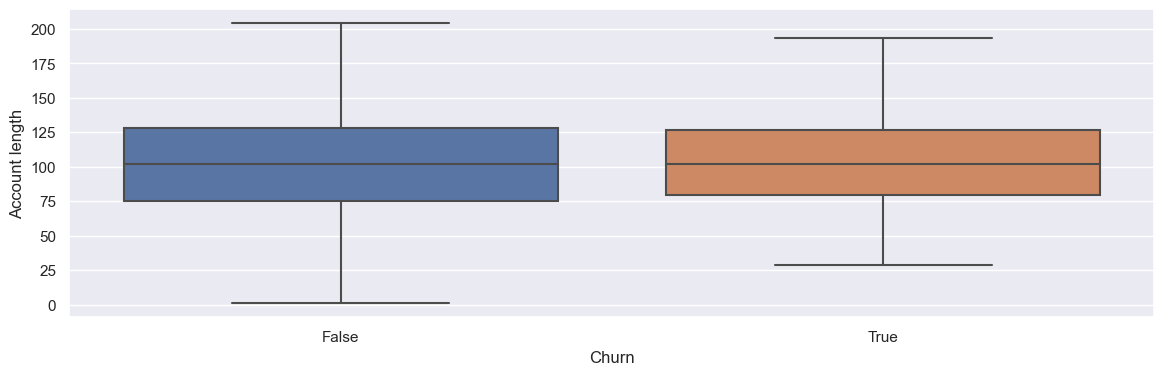

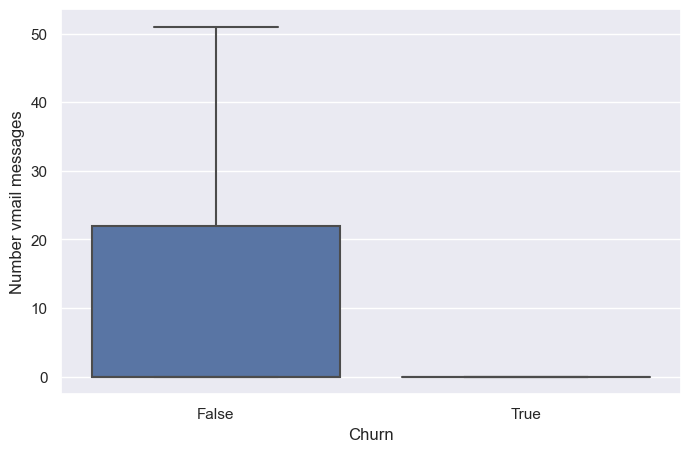

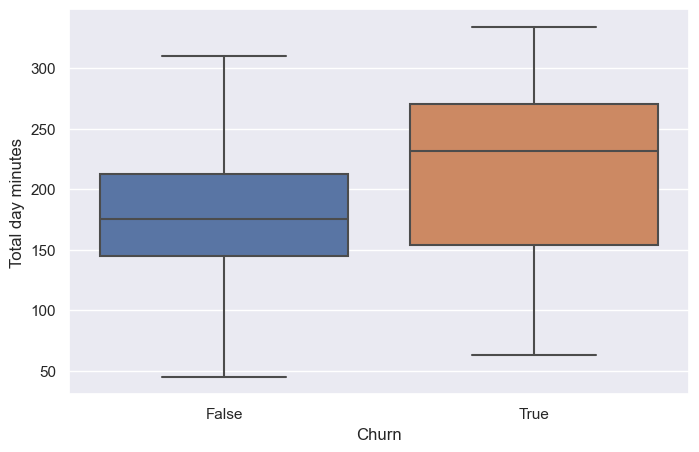

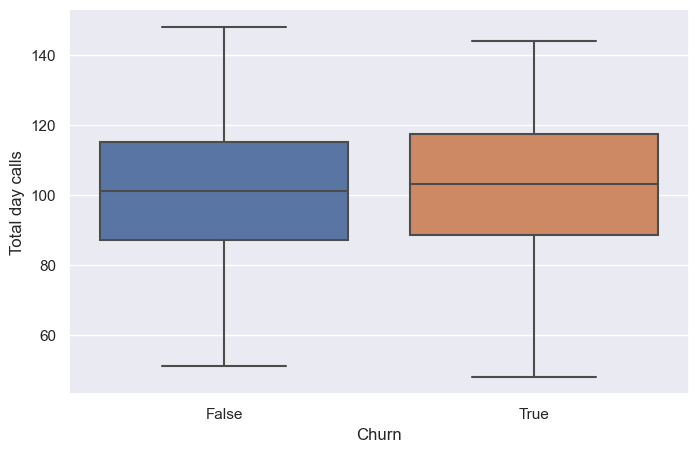

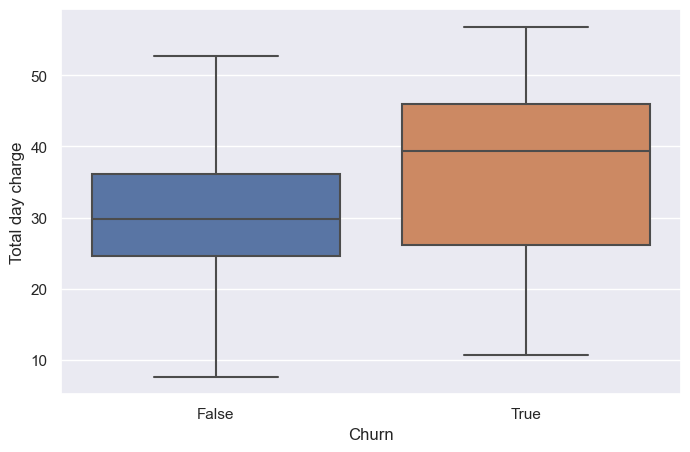

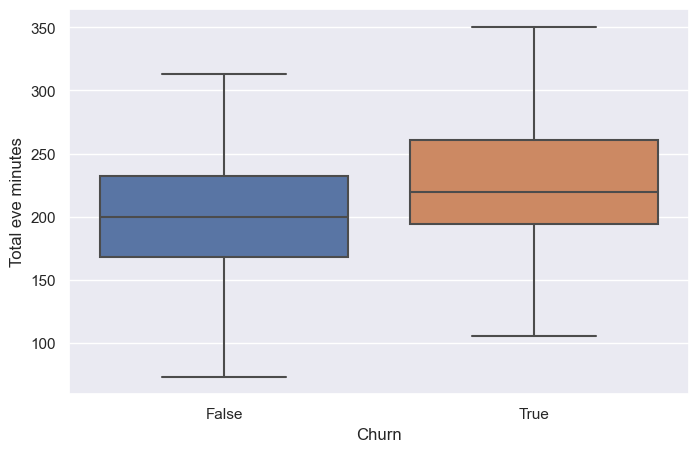

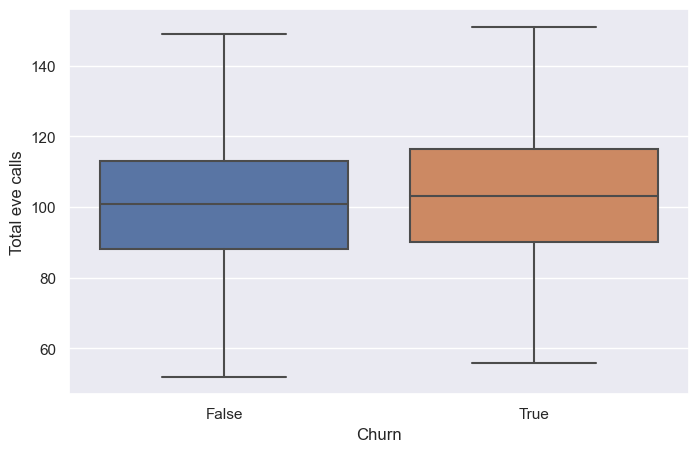

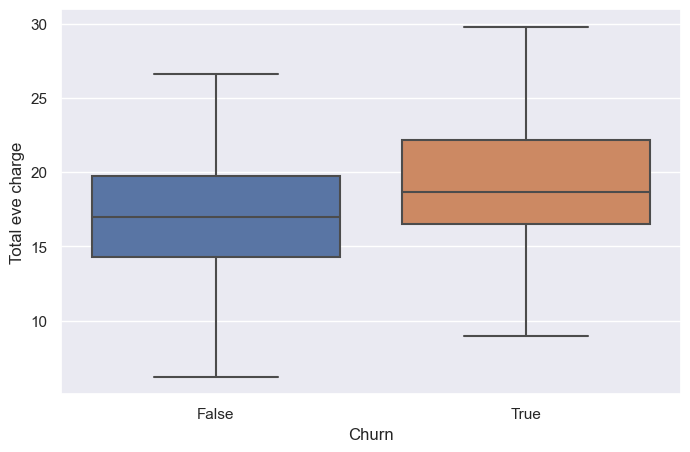

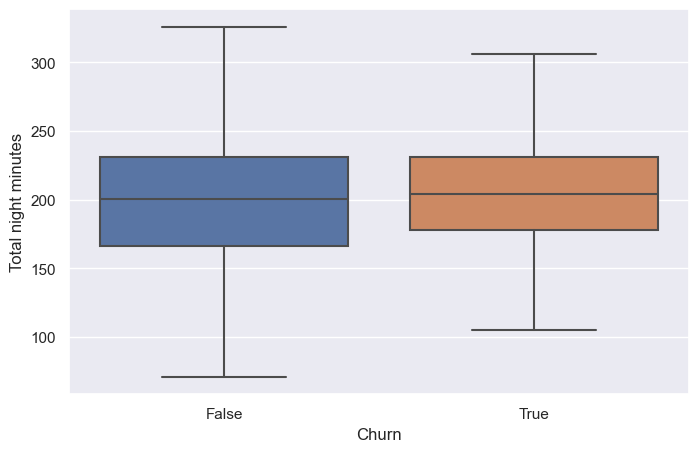

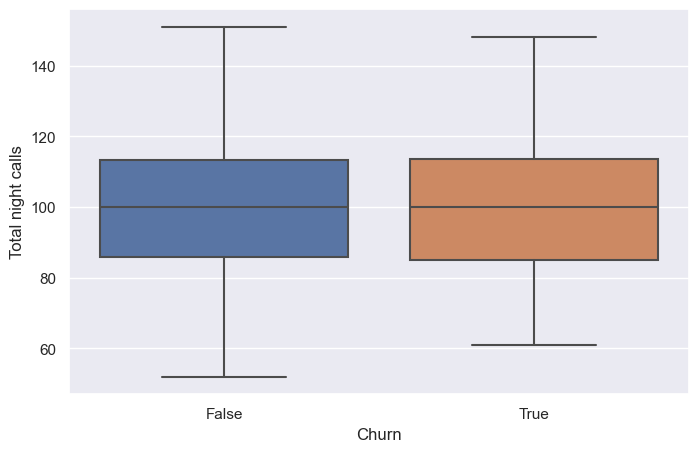

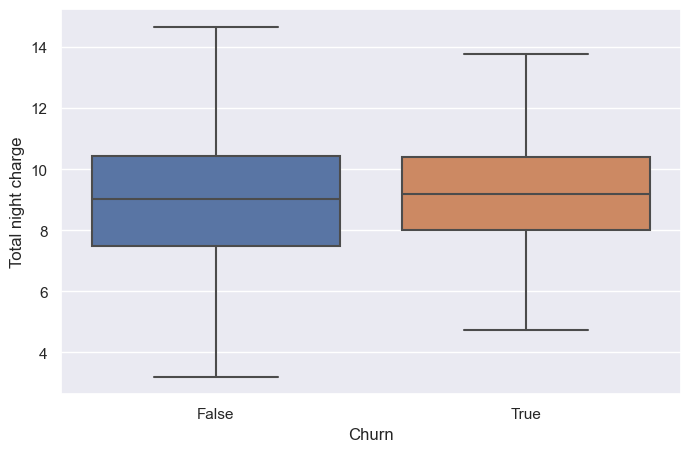

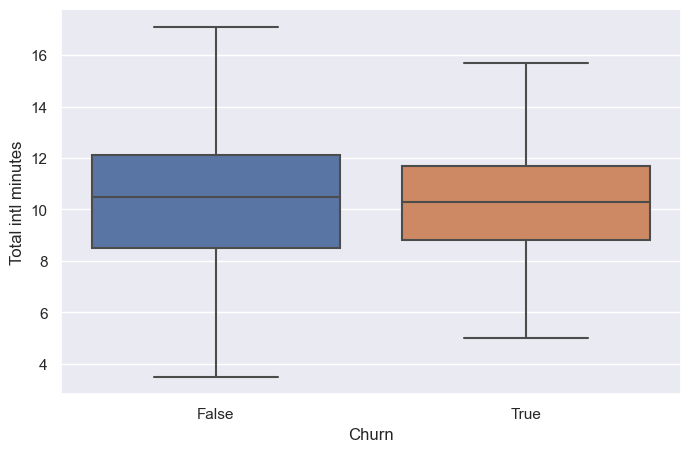

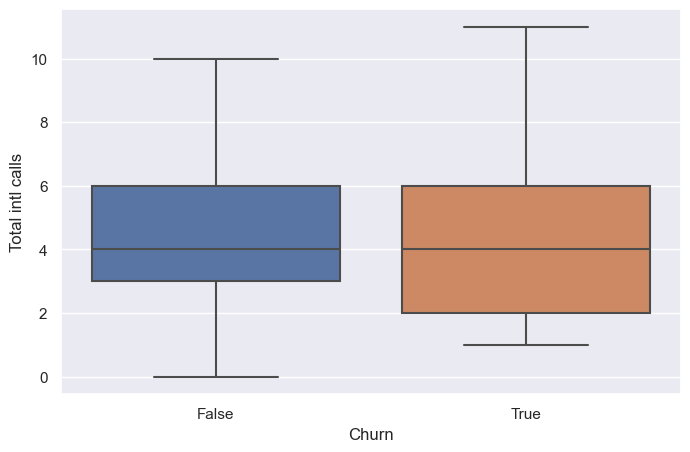

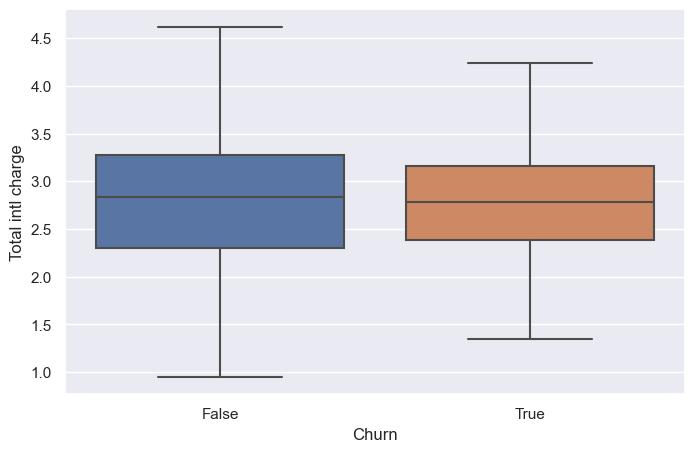

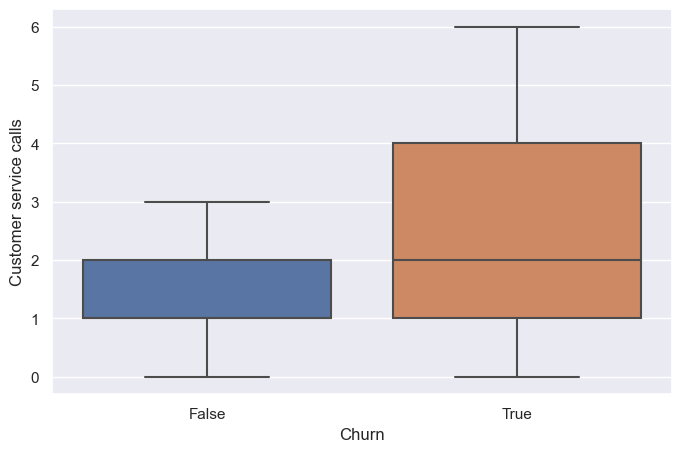

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

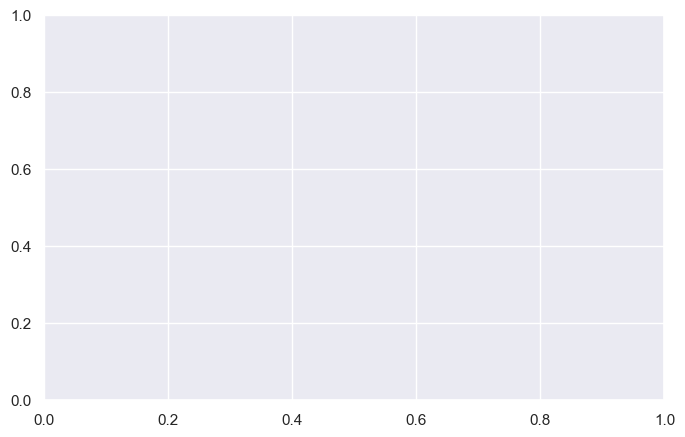

In [76]:
lo = df[["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls", "Churn"]]
numerical = lo

plt.figure(figsize=(14,4))

for i, col in enumerate(numerical):
    sns.boxplot(x = "Churn", y = f"{col}", data = numerical, sym = "")
    ax.set_title(f"{col}")
    plt.show()

In [ ]:
cols = ["Voice mail plan", "International plan", "Churn"]
numerical = cols

plt.figure(figsize=(14,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1,len(numerical), i+1)
    df[str(col)].value_counts().plot(kind="bar", color=["C0", "C1"])
    ax.set_title(f"{col}"